In [0]:

# dbutils.fs.cp( 'dbfs:/kmodel' ,'file:/databricks/driver/km_model' ,True)
!pip install seaborn --upgrade #upgrading plotting Library


In [0]:

import pandas as pd
import numpy as np
from numpy import array
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Setting up Pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark import sql
from pyspark.sql.types import DoubleType
from pyspark.sql import functions as F
from pyspark.sql.functions import *

from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
#sc= SparkContext()        # Uncomment these if you are not using DataBricks
#sqlContext = SQLContext(sc)

### Importing Data
For this analysis, data for Yellow taxi has been collected for a duration of 1 month (~2 GB).

In [0]:
# Loading the data as a Spark data frame from CSV file
data_original = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('dbfs:/FileStore/yellow_tripdata_2016_01.csv')

In [0]:
data = data_original 
describe = data.describe()
display(describe)

summary,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,10906858,10906858,10906858,10906858,10906858,10906858,10906858,10906858,10906858,10906858,10906858,10906858,10906858,10906858,10906858,10906858,10906858,10906858,10906858
mean,1.5350238354620551,null,null,1.670846819496504,4.648196988536868,-72.81869455769787,40.11494259107597,1.0393496458833515,null,-72.88659117441934,40.15315229928887,1.3475360181639846,12.486929470430423,0.3130756896257383,0.4976704592651706,1.7506631158121155,0.2933452622194928,0.29972446051382845,15.641395247926114
stddev,0.49877184539468683,null,null,1.3248907816769706,2981.0953288423316,9.168964159535648,5.0510224326758655,0.5186309162351989,null,8.900841453884862,4.90345587068521,0.4910804464319991,35.56400378933263,0.4156791924614062,0.05046685412593845,2.623545826135015,1.6945719541113626,0.01232553373567381,36.41280207334372
min,1,2016-01-01 00:00:00,2016-01-01 00:00:00,0,0.0,-121.93428802490234,0.0,1,N,-121.93348693847656,0.0,1,-957.6,-42.61,-0.5,-220.8,-17.4,-0.3,-958.4
max,2,2016-01-31 23:59:59,2016-03-28 12:54:26,9,8000010.0,0.0,60.908756256103516,99,Y,0.0,60.908756256103516,5,111270.85,648.87,89.7,998.14,980.15,0.3,111271.65


In [0]:
data.printSchema()

root
-- VendorID: integer (nullable = true)
-- tpep_pickup_datetime: string (nullable = true)
-- tpep_dropoff_datetime: string (nullable = true)
-- passenger_count: integer (nullable = true)
-- trip_distance: double (nullable = true)
-- pickup_longitude: double (nullable = true)
-- pickup_latitude: double (nullable = true)
-- RatecodeID: integer (nullable = true)
-- store_and_fwd_flag: string (nullable = true)
-- dropoff_longitude: double (nullable = true)
-- dropoff_latitude: double (nullable = true)
-- payment_type: integer (nullable = true)
-- fare_amount: double (nullable = true)
-- extra: double (nullable = true)
-- mta_tax: double (nullable = true)
-- tip_amount: double (nullable = true)
-- tolls_amount: double (nullable = true)
-- improvement_surcharge: double (nullable = true)
-- total_amount: double (nullable = true)

In [0]:
display(data)

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.1,-73.99037170410156,40.73469543457031,1,N,-73.98184204101562,40.73240661621094,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.9,-73.98078155517578,40.72991180419922,1,N,-73.94447326660156,40.716678619384766,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.98455047607422,40.6795654296875,1,N,-73.95027160644531,40.78892517089844,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.99346923828125,40.718990325927734,1,N,-73.96224212646484,40.65733337402344,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.96062469482422,40.78133010864258,1,N,-73.97726440429688,40.758514404296875,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8
2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.98011779785156,40.74304962158203,1,N,-73.91349029541016,40.76314163208008,2,19.0,0.5,0.5,0.0,0.0,0.3,20.3
2,2016-01-01 00:00:00,2016-01-01 00:26:45,2,7.45,-73.99405670166016,40.71998977661133,1,N,-73.96636199951172,40.78987121582031,2,26.0,0.5,0.5,0.0,0.0,0.3,27.3
1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.2,-73.97942352294922,40.74461364746094,1,N,-73.99203491210938,40.753944396972656,2,9.0,0.5,0.5,0.0,0.0,0.3,10.3
1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.0,-73.94715118408203,40.791046142578125,1,N,-73.92076873779297,40.865577697753906,2,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.99834442138672,40.72389602661133,1,N,-73.995849609375,40.68840026855469,2,11.5,0.5,0.5,0.0,0.0,0.3,12.8


In [0]:
# Converting to Pandas Data frame to do visiualizaions
pandas_initial_df = data.toPandas()

#Data Cleaning
The datatypes of the columns need to be changed to float type.
Also we see with the distribution of the trip_duration that almost all the trips are under 20 miles , so we remove any outliers.</br>

The ouliers we removed via thorough manual data analysis by checking the distribution of each feature

In [0]:
df_removed_ol.describe().apply(lambda s: s.apply('{0:.5f}'.format)) #Data after outliers are removed

Out[71]:

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9381532.00000,9381532.00000,9381532.00000,9381532.00000,9381532.00000,9381532.00000,9381532.00000,9381532.00000,9381532.00000,9381532.00000,9381532.00000,9381532.00000,9381532.00000,9381532.00000,9381532.00000,9381532.00000
mean,1.53266,1.66699,2.94964,-72.85008,40.13107,1.00597,-72.90975,40.16531,1.36620,9.08843,0.31663,0.49940,1.20887,0.00508,0.29996,11.41835
std,0.49893,1.32385,1873.47368,9.07120,4.99702,0.37683,8.82542,4.86181,0.49495,3.91612,0.36804,0.01819,1.17632,0.18436,0.00338,4.42742
min,1.00000,0.00000,0.00000,-121.93429,0.00000,1.00000,-121.93349,0.00000,1.00000,-0.50000,-16.65000,-0.50000,-23.80000,0.00000,-0.30000,-0.80000
25%,1.00000,1.00000,0.90000,-73.99168,40.73820,1.00000,-73.99135,40.73794,1.00000,6.00000,0.00000,0.50000,0.00000,0.00000,0.30000,8.00000
50%,2.00000,1.00000,1.46000,-73.98196,40.75427,1.00000,-73.98051,40.75482,1.00000,8.50000,0.00000,0.50000,1.15000,0.00000,0.30000,10.56000
75%,2.00000,2.00000,2.30000,-73.96867,40.76765,1.00000,-73.96600,40.76924,2.00000,11.50000,0.50000,0.50000,2.00000,0.00000,0.30000,14.16000
max,2.00000,9.00000,4667468.70000,0.00000,60.90876,99.00000,0.00000,52.74897,5.00000,23.80000,7.00000,17.45000,22.02000,23.04000,0.30000,23.39000


In [0]:
# CHECK POINT 1

# IF STUFF FAILS , START FROM HERE
#dbutils.fs.put("/dbfs/FileStore/data_without_outlier.csv",df_spark_ol)
#Sample.coalesce(1).write.format(“com.databricks.spark.csv”).option(“header”, “true”).save(“dbfs:/FileStore/df/Sample.csv”)
#df_spark_ol.coalesce(1).write.format('com.databricks.spark.csv').option("sep",",").option('header', 'true').save('dbfs:/FileStore/data_outl_rem.csv')
#load_data = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('dbfs:/FileStore/data_outl_rem.csv')

In [0]:
 def clean_and_filter(df):

    ## Converting to appropriate datatypes
    df = df.withColumn('pickup_longitude', df['pickup_longitude'].cast('float'))
    df = df.withColumn('pickup_latitude', df['pickup_latitude'].cast('float'))
    df = df.withColumn('dropoff_longitude', df['dropoff_longitude'].cast('float'))
    df = df.withColumn('dropoff_latitude', df['dropoff_latitude'].cast('float'))
    df = df.withColumn('trip_distance', df['trip_distance'].cast('float'))
    
    # removing Outliers 
    #According to the dstribution , Removing distance greater than 20 miles and remove negative amounts)
    df = df.filter(df.trip_distance<20.0)
    df = df.filter(df.total_amount > 0 ).filter(df.total_amount < 80)

    ## Dropping null rows
    df = df.na.drop()
    return df
df = clean_and_filter(data)

In [0]:
df.count()

Out[8]: 10823037

# Feature Engineering

### Computing Average Speed

Average traffic speed is a good indicator of underlying traffic and can be a good predictor of the trip duration . Therefor we will add new two variables ; average_speed and Trip duration .
We calculated the duration of the trip by calculating the differnce between dropoff time and pickup time.
And the Speed was calculated by : </br>
  <b>*v = s/t*</b>
<br>where s = trip distance and t = trip duration

### Additional Features
Information about the weekday/weekend can also prove detrimental in determing the trip duration.

In [0]:
## Computing Speed
format = "yyyy-MM-dd HH:mm:ss"
timeDiff = (F.unix_timestamp('tpep_dropoff_datetime', format) - F.unix_timestamp('tpep_pickup_datetime', format))/60
df = df.withColumn("tpep_pickup_datetime", from_unixtime(unix_timestamp(df.tpep_pickup_datetime, "yyyy-MM-dd HH:mm:ss")))
df = df.withColumn("pickup_hr",hour(df.tpep_pickup_datetime))
df = df.withColumn("Duration_in_mins", timeDiff)
df = df.filter(df.Duration_in_mins > 0).filter(df.Duration_in_mins <60.0)
df = df.withColumn("Speed_mph",df.trip_distance/ ((df.Duration_in_mins)/60))
df = df.filter(df.Speed_mph<55.0)
df = df.withColumn("pickup_month",month(df.tpep_pickup_datetime))



In [0]:
import datetime as dt
## Computing day of the week by using a User Defined Function
def get_weekday(date):
    import datetime
    import calendar
    date = date.split(' ')[0]
    year,month,day = (int(x) for x in date.split('-'))    
    weekday = datetime.date(year, month, day)
    return calendar.day_name[weekday.weekday()]


weekday_udf = udf(get_weekday)
df = df.withColumn('pickup_day', weekday_udf(df.tpep_pickup_datetime))

In [0]:

from pyspark.ml.feature import VectorAssembler

### Converting lat long to float values

from pyspark.sql.types import DoubleType
df = df.withColumn('pickup_longitude', df['pickup_longitude'].cast('float'))
df = df.withColumn('pickup_latitude', df['pickup_latitude'].cast('float'))
df = df.withColumn('dropoff_longitude', df['dropoff_longitude'].cast('float'))
df = df.withColumn('dropoff_latitude', df['dropoff_latitude'].cast('float'))

#Merging Dropoff_lats and Longs into a single Dense Vector
vecAssembler = VectorAssembler(inputCols=["dropoff_latitude", "dropoff_longitude"], outputCol="features")
new_df = vecAssembler.transform(df)

In [0]:
display(new_df_describe)

summary,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hr,Duration_in_mins,Speed_mph,pickup_month,pickup_day,pickup_cluster,dropoff_cluster
count,10836708,10836708,10836708,10836708,10836708,10836708,10836708,10836708,0,10836708,10836708,10836708,10836708,10836708,10836708,10836708,10836708,10836708,10836708,10836708,10836708,10836708,10836708,10836708,10836708,10836708
mean,1.53536415302507,null,null,1.6711326908503947,2.7908833694395327,-72.82298158656131,40.117297489529406,1.0328366326747938,null,-72.9590228567242,40.19304605441461,1.3470347267823402,12.216233969762754,0.31416411330821137,0.4979116960612024,1.7172585392168902,0.268414310877509,0.29973860788273926,15.313710776456592,13.545234493722633,15.086546457036057,13.601828323916214,1.0,null,7.113236049176558,7.020733787419574
stddev,0.4987478317097327,null,null,1.325444644872537,3.2729222367346775,9.154858826706636,5.043250451120907,0.4171641928212901,null,8.604318144503678,4.7401047739217645,0.4908110346211536,35.42054903103305,0.41613684167216164,0.0407373868596427,2.4875192483119157,1.5755307803624075,0.01216575958338766,36.159580975501896,6.392359908798213,87.02379524925955,138.08125527765537,0.0,null,3.9528831253399024,4.037024237546362
min,1.0,2016-01-01 00:00:00,2016-01-01 00:00:11,0.0,0.0,-121.93429,0.0,1.0,null,-121.93349,0.0,1.0,-957.6,-42.61,-0.5,-220.8,-17.4,-0.3,-958.4,0,0.016666666666666666,0.0,1,Friday,0,0
max,2.0,2016-01-31 23:59:59,2016-03-28 12:54:26,9.0,19.989999771118164,0.0,60.908756,99.0,null,0.0,60.908756,5.0,111270.85,648.87,43.41,998.14,980.15,0.3,111271.65,23,119912.7,67679.99725341797,1,Wednesday,14,14


In [0]:
display(new_df_describe) # Outliers Removed

summary,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hr,Duration_in_mins,Speed_mph,pickup_month,pickup_day,pickup_cluster,dropoff_cluster
count,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236
mean,1.5327958285228556,null,null,1.6669061150778564,1.729711649679812,-72.8587768849225,40.13586109194885,1.0043486791766065,null,-72.98899537941841,40.20898048563821,1.361057507429536,8.89992517419433,0.31810809542704577,0.49954682565341196,1.2100522473662663,0.00433312450865315,0.2999908424043121,11.231956244033926,13.592075059639717,9.98628544277623,10.756278330746712,1.0,null,6.994139164733362,7.044491250143822
stddev,0.4989233015769992,null,null,1.3237610982364802,1.1337172610890855,9.037113994253362,4.9782657281141125,0.2631791050043654,null,8.49679716809379,4.6808104079025705,0.4923940475872409,3.6978729321274346,0.3677918046328298,0.016123377905399288,1.1639109070422389,0.16148831082351633,0.0016550192963153975,4.24431462880387,6.342939293381319,5.3263990099252725,4.3944412367674195,0.0,null,3.9449657061692553,3.965585406943539
min,1,2016-01-01 00:00:00,2016-01-01 00:00:11,0,0.0,-121.933426,0.0,1,N,-121.93349,0.0,1,0.0,-16.65,0.0,-0.17,0.0,0.0,0.01,0,0.016666666666666666,0.0,1,Friday,0,0
max,2,2016-01-31 23:59:59,2016-02-01 00:21:05,9,11.9,0.0,60.908756,99,Y,0.0,52.748966,5,23.0,7.0,17.45,22.02,21.0,0.3,23.39,23,24.983333333333334,29.999999623549616,1,Wednesday,14,14


## Clustering into zones

Each coordiantes refer to a specific location in the map , so we Cluster the coordinates into regions.Certain regions in the city can have high traffic and thus can be a good indicator of trip duration. <br>
The cluster information is uesd to create additional features such as:<br>
a. pickup cluster <br>
b. dropoff cluster

In [0]:
from pyspark.ml.clustering import KMeans , KMeansModel

kmeans = KMeans(k=15, seed=1)  # clusterring into 15 zones
km_model = kmeans.fit(new_df.select('features')) 

#We train only on dropoff lats and long (the new denese feature vector we created), beacause training on pickup lats and long will also be the same so its reduntant to use em both . as both are similar features ( distances )

In [0]:
#km_model.save('kmodel')
#LOAD THE MODEL
from pyspark.ml.clustering import KMeans , KMeansModel
km_model = KMeansModel.load("dbfs:/kmodel")


In [0]:
### Vecorizing and getting pickup clusters
vecAssembler = VectorAssembler(inputCols=["pickup_latitude", "pickup_longitude"], outputCol="features")
new_df = vecAssembler.transform(df)
#Clustering  Pickup Lats and long.
df = km_model.transform(new_df)  

In [0]:
## assigniung prediction to pickup cluster
df = df.withColumnRenamed('prediction', 'pickup_cluster')
df = df.drop('features')

### Vecorizing and getting dropoff clusters
vecAssembler = VectorAssembler(inputCols=["dropoff_latitude", "dropoff_longitude"], outputCol="features")
new_df = vecAssembler.transform(df)
df = km_model.transform(new_df)

## assigniung prediction to dropoff cluster
df = df.withColumnRenamed('prediction', 'dropoff_cluster')
df = df.drop('features')

In [0]:
df.printSchema()

root
-- VendorID: integer (nullable = true)
-- tpep_pickup_datetime: string (nullable = true)
-- tpep_dropoff_datetime: string (nullable = true)
-- passenger_count: integer (nullable = true)
-- trip_distance: float (nullable = true)
-- pickup_longitude: float (nullable = true)
-- pickup_latitude: float (nullable = true)
-- RatecodeID: integer (nullable = true)
-- store_and_fwd_flag: string (nullable = true)
-- dropoff_longitude: float (nullable = true)
-- dropoff_latitude: float (nullable = true)
-- payment_type: integer (nullable = true)
-- fare_amount: double (nullable = true)
-- extra: double (nullable = true)
-- mta_tax: double (nullable = true)
-- tip_amount: double (nullable = true)
-- tolls_amount: double (nullable = true)
-- improvement_surcharge: double (nullable = true)
-- total_amount: double (nullable = true)
-- pickup_hr: integer (nullable = true)
-- Duration_in_mins: double (nullable = true)
-- Speed_mph: double (nullable = true)
-- pickup_month: integer (nullable = true)
-- pickup_day: string (nullable = true)
-- pickup_cluster: integer (nullable = false)
-- dropoff_cluster: integer (nullable = false)

In [0]:

# CHECKPOINT 2
#Saving the Dataset #Load data from from here # CLEAN DATA SAVED
#df.coalesce(1).write.format('com.databricks.spark.csv').option("sep",",").option('header', #'true').save('dbfs:/FileStore/cleaned_data.csv')
df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('dbfs:/FileStore/cleaned_data.csv')


In [0]:
des = df.describe()
display(des)

summary,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hr,Duration_in_mins,Speed_mph,pickup_month,pickup_day,pickup_cluster,dropoff_cluster
count,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236,9143236
mean,1.5327958285228556,null,null,1.6669061150778564,1.729711649679812,-72.8587768849225,40.13586109194885,1.0043486791766065,null,-72.98899537941841,40.20898048563821,1.361057507429536,8.89992517419433,0.31810809542704577,0.49954682565341196,1.2100522473662663,0.00433312450865315,0.2999908424043121,11.231956244033926,13.592075059639717,9.98628544277623,10.756278330746712,1.0,null,6.994139164733362,7.044491250143822
stddev,0.4989233015769992,null,null,1.3237610982364802,1.1337172610890855,9.037113994253362,4.9782657281141125,0.2631791050043654,null,8.49679716809379,4.6808104079025705,0.4923940475872409,3.6978729321274346,0.3677918046328298,0.016123377905399288,1.1639109070422389,0.16148831082351633,0.0016550192963153975,4.24431462880387,6.342939293381319,5.3263990099252725,4.3944412367674195,0.0,null,3.9449657061692553,3.965585406943539
min,1,2016-01-01 00:00:00,2016-01-01 00:00:11,0,0.0,-121.933426,0.0,1,N,-121.93349,0.0,1,0.0,-16.65,0.0,-0.17,0.0,0.0,0.01,0,0.016666666666666666,0.0,1,Friday,0,0
max,2,2016-01-31 23:59:59,2016-02-01 00:21:05,9,11.9,0.0,60.908756,99,Y,0.0,52.748966,5,23.0,7.0,17.45,22.02,21.0,0.3,23.39,23,24.983333333333334,29.999999623549616,1,Wednesday,14,14


## Visualizing the cluster
The figure below the different clusters based on the lat/long of pickup co-ordinates.

/databricks/python/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
 warnings.warn(msg, UserWarning)
Out[77]:

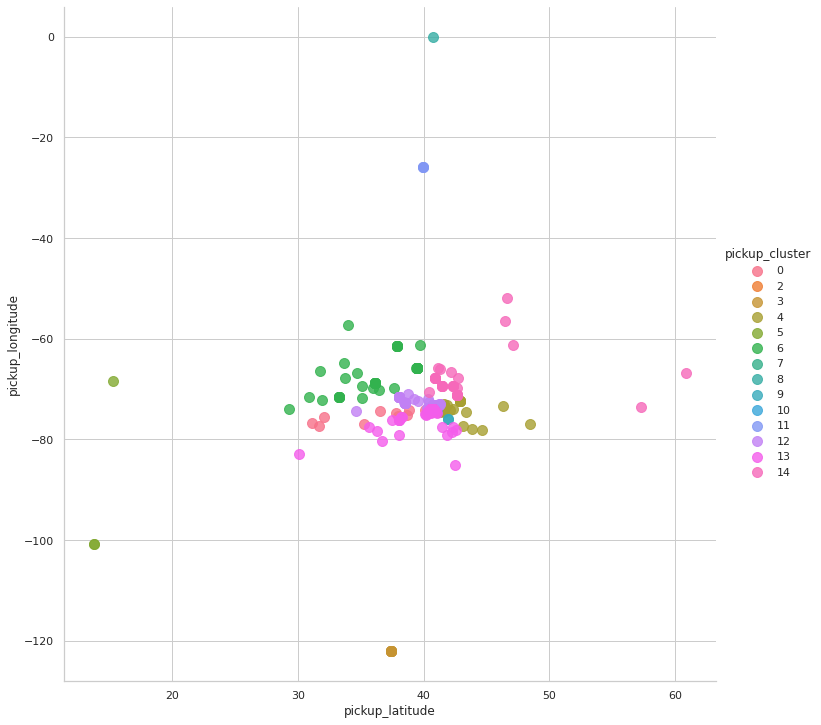

<seaborn.axisgrid.FacetGrid at 0x7f473165a760>

In [0]:
import seaborn as sns
%matplotlib inline
### Visualizing the clusters
#pd_df = df.toPandas()
sns.set_style("whitegrid")
sns.lmplot(x="pickup_latitude", y="pickup_longitude",data = pd_df[pd_df['pickup_latitude']!=0.0],fit_reg=False,hue='pickup_cluster',size=10,scatter_kws={"s":100})

/databricks/python/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
 warnings.warn(msg, UserWarning)
Out[79]:

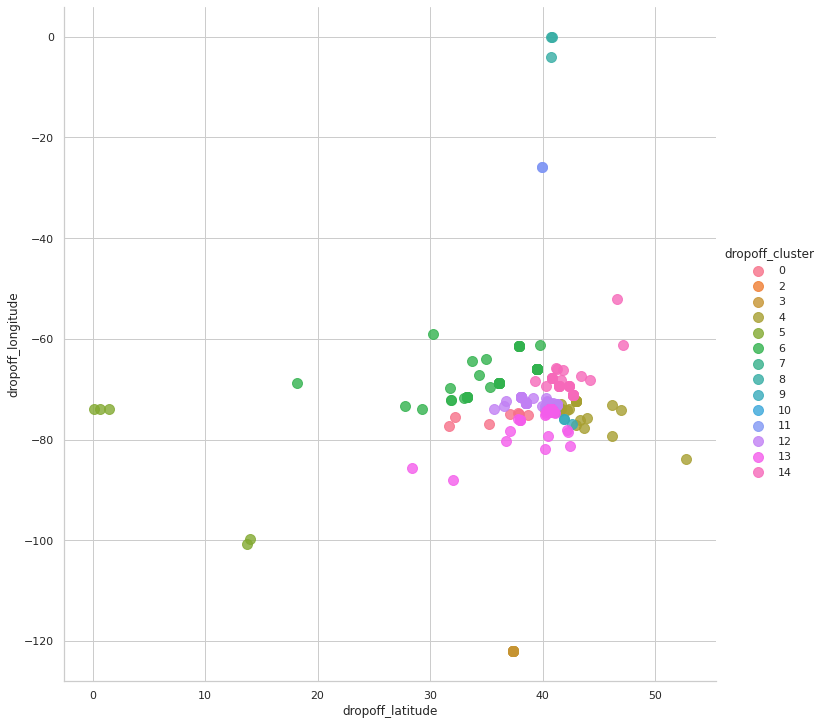

<seaborn.axisgrid.FacetGrid at 0x7f46c3c6ddf0>

In [0]:
sns.set_style("whitegrid")
sns.lmplot(x="dropoff_latitude", y="dropoff_longitude",data = pd_df[pd_df['dropoff_latitude']!=0.0],fit_reg=False,hue='dropoff_cluster',size=10,scatter_kws={"s":100})

In [0]:
#sample =pd_df.sample(frac=0.005 , random_state=43)
sample = df.sample(withReplacement=False, fraction=0.005, seed=3).toPandas() # Take a sample of dataset for visualization

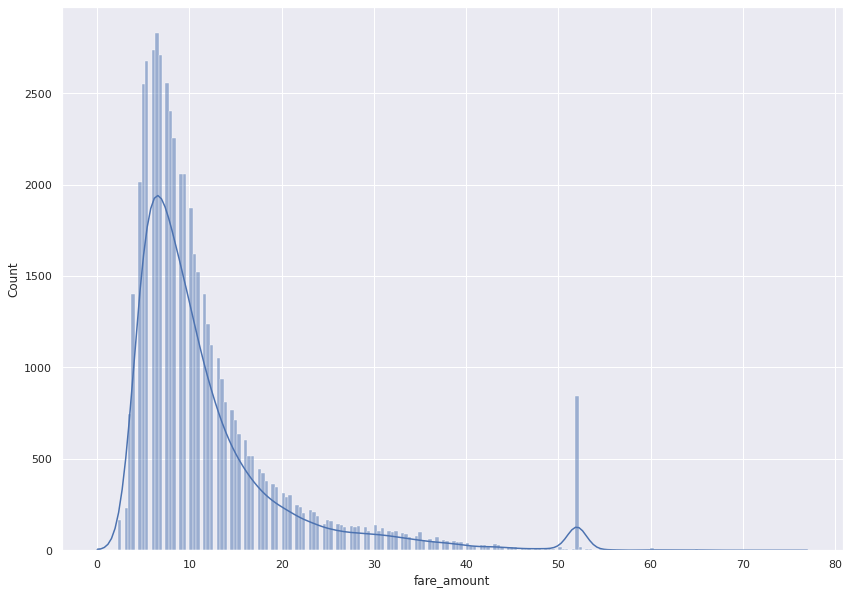

In [0]:
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(14, 10)})
fig, ax = plt.subplots()
sns.histplot(sample, x='fare_amount' ,kde=True)
#ax.set_xlim(0,65)
#ax.set_ylim(1,20)
#ax.set_xticks(range(1,31))
plt.show()

Out[59]:

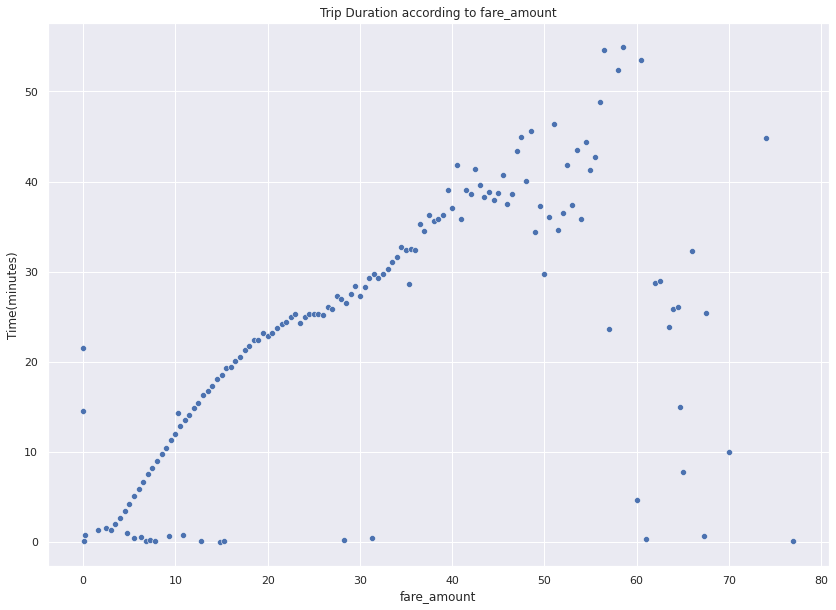

<matplotlib.axes._subplots.AxesSubplot at 0x7fa9e18b1670>

In [0]:
fare_count =sample.groupby('fare_amount')['Duration_in_mins'].mean()
plt.title('Trip Duration according to fare_amount')
plt.ylabel('Time(minutes)')
#sns.barplot(passenger_count.index, passenger_count.values )
sns.scatterplot(fare_count.index, fare_count.values  )

Out[62]:

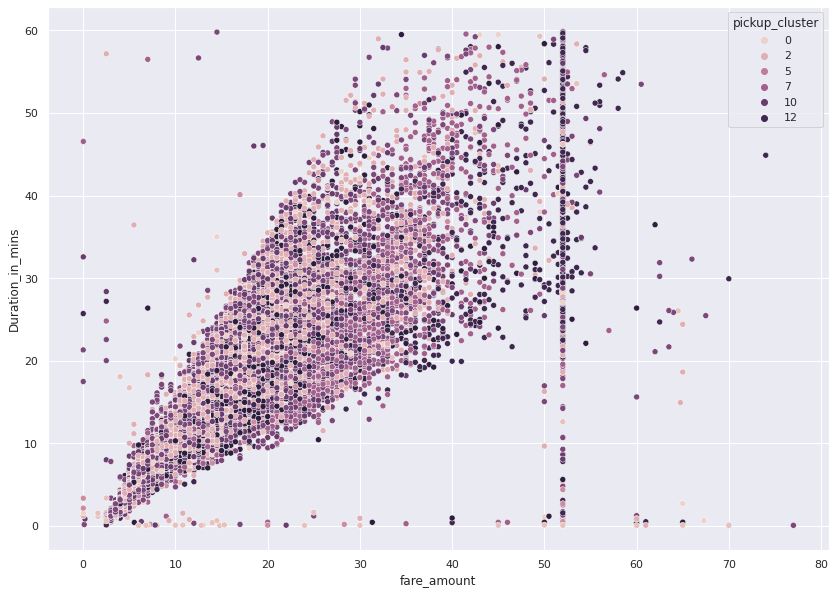

<matplotlib.axes._subplots.AxesSubplot at 0x7fa9e1768ee0>

In [0]:

#sns.barplot(passenger_count.index, passenger_count.values )
sns.scatterplot(data = sample, x = 'fare_amount' , y = 'Duration_in_mins' , hue = 'pickup_cluster')

Out[54]:

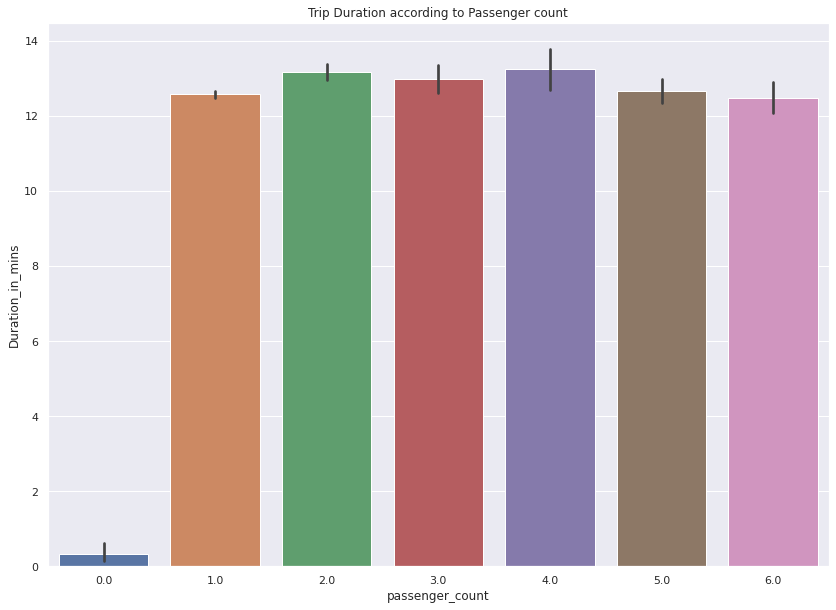

Text(0.5, 1.0, 'Trip Duration according to Passenger count')

In [0]:
sns.barplot(data = sample , x='passenger_count' , y = 'Duration_in_mins'  )
plt.title('Trip Duration according to Passenger count')

Out[53]:

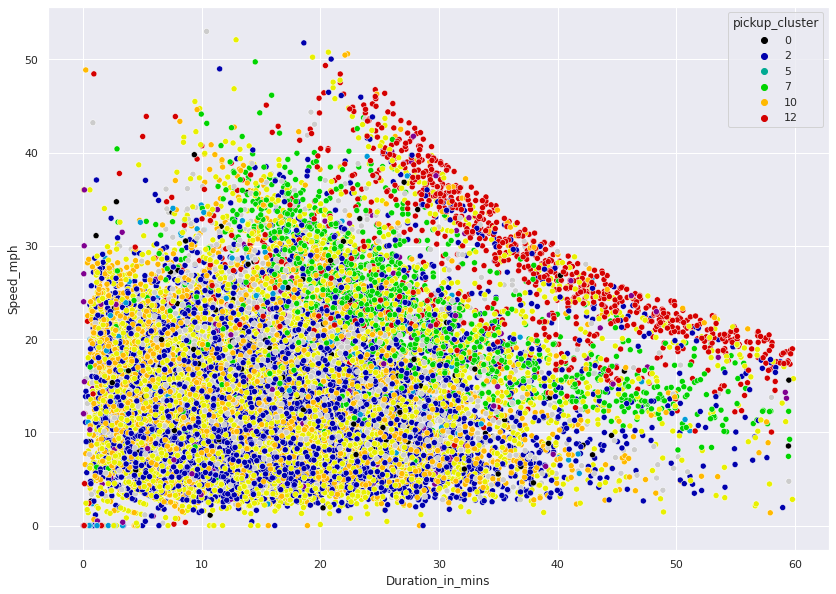

<matplotlib.axes._subplots.AxesSubplot at 0x7fa9e1a9cf70>

In [0]:
sns.scatterplot(data = sample, x="Duration_in_mins", y="Speed_mph", hue="pickup_cluster" , palette="nipy_spectral", cmap=True)

/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
 warnings.warn(
Out[43]:

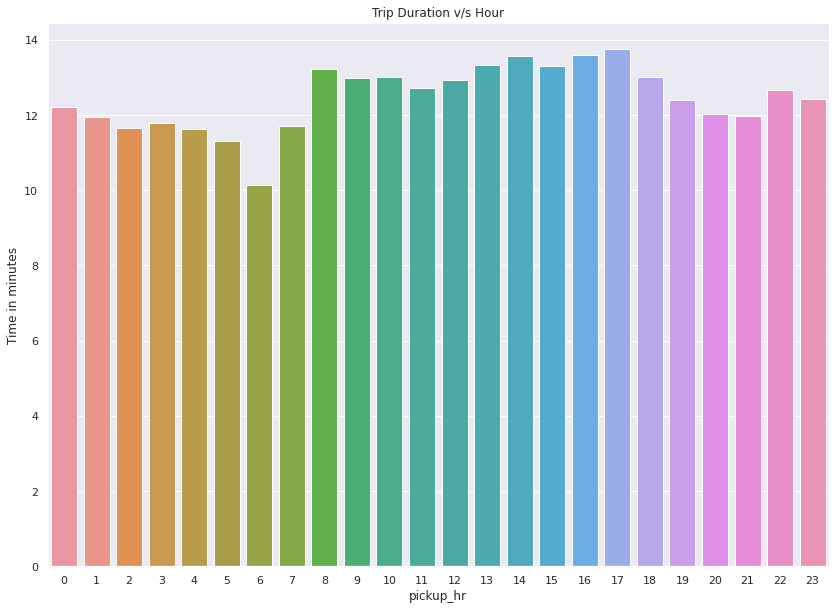

<matplotlib.axes._subplots.AxesSubplot at 0x7fa9e1cd75e0>

In [0]:
hour = sample.groupby('pickup_hr')['Duration_in_mins'].mean()

plt.title('Trip Duration v/s Hour')
plt.ylabel('Time in minutes')
sns.barplot(hour.index, hour.values)

/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
 warnings.warn(
Out[45]:

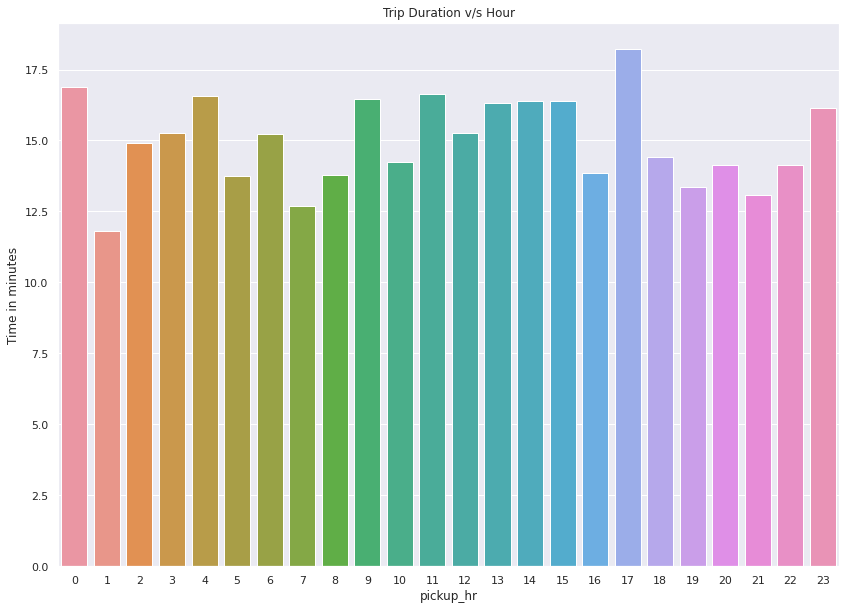

<matplotlib.axes._subplots.AxesSubplot at 0x7fbe0fe689a0>

In [0]:
hour = sample.groupby('pickup_hr')['Duration_in_mins'].mean()

plt.title('Trip Duration v/s Hour')
plt.ylabel('Time in minutes')
sns.barplot(hour.index, hour.values)

/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
 warnings.warn(
Out[36]:

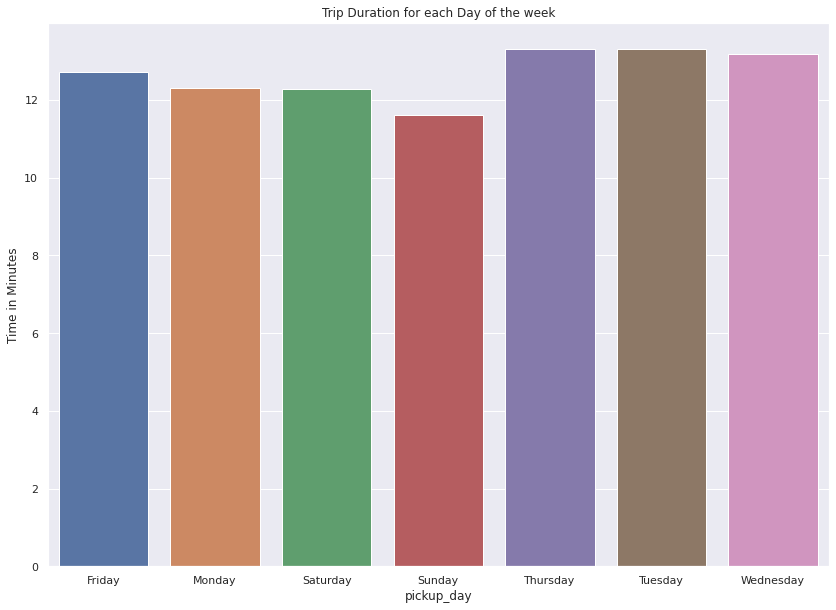

<matplotlib.axes._subplots.AxesSubplot at 0x7f9d2e19e550>

In [0]:
day_week = sample.groupby('pickup_day')['Duration_in_mins'].mean()

plt.title('Trip Duration for each Day of the week')
plt.ylabel('Time in Minutes')
sns.barplot(day_week.index, day_week.values)

/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
 warnings.warn(
Out[37]:

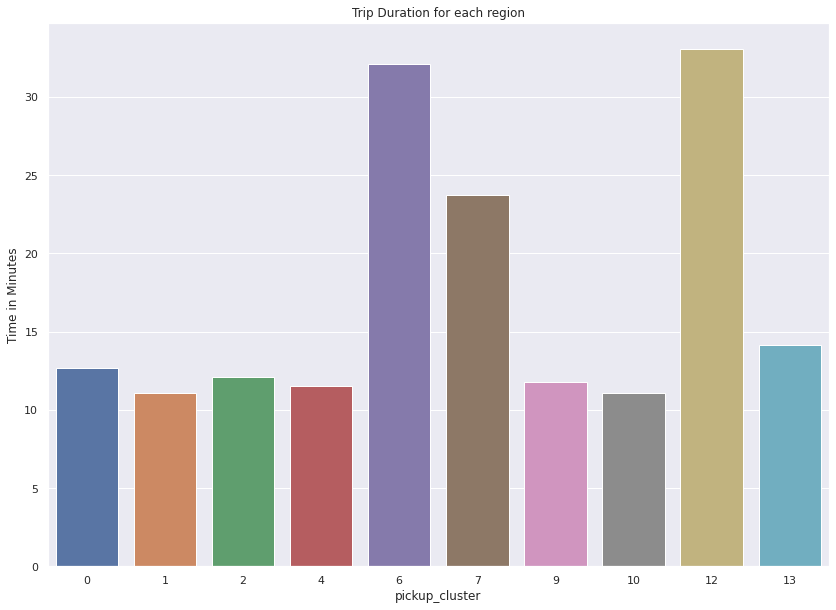

<matplotlib.axes._subplots.AxesSubplot at 0x7f9d241dfc70>

In [0]:
pickup_cluster = sample.groupby('pickup_cluster')['Duration_in_mins'].mean()

plt.title('Trip Duration for each region')
plt.ylabel('Time in Minutes')
sns.barplot(pickup_cluster.index, pickup_cluster.values)

/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
 warnings.warn(
Out[40]:

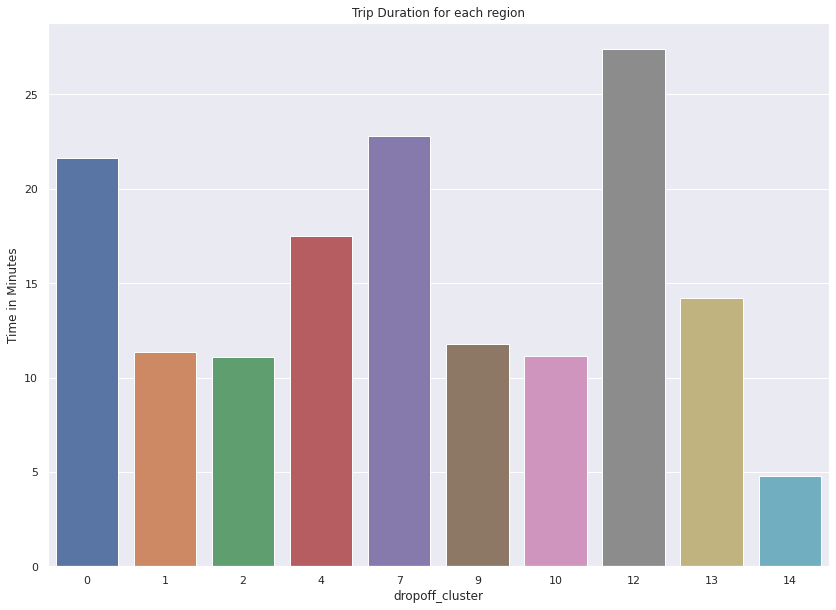

<matplotlib.axes._subplots.AxesSubplot at 0x7f9d17fd1160>

In [0]:
pickup_cluster = sample.groupby('dropoff_cluster')['Duration_in_mins'].mean()

plt.title('Trip Duration for each region')
plt.ylabel('Time in Minutes')
sns.barplot(pickup_cluster.index, pickup_cluster.values)

Out[50]:

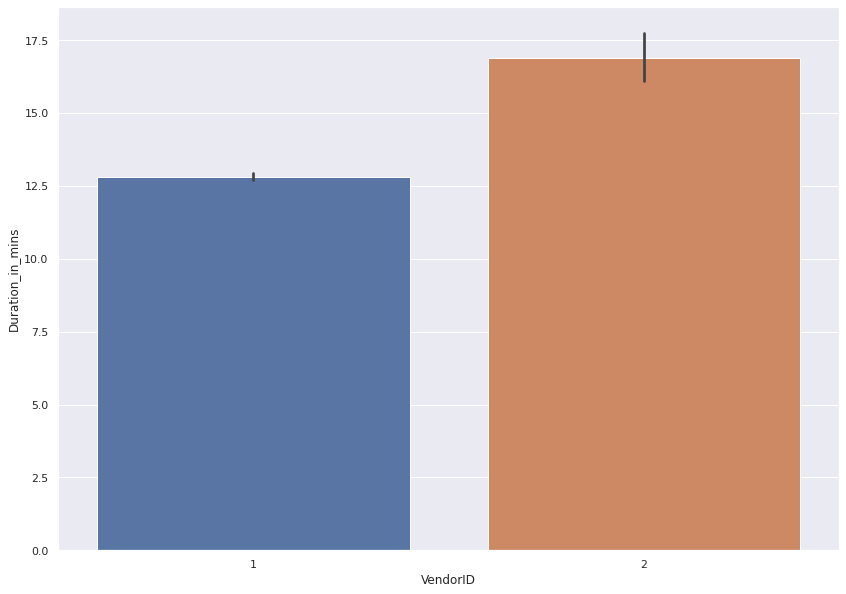

<matplotlib.axes._subplots.AxesSubplot at 0x7fbdfec7d910>

In [0]:
sns.barplot(data = sample , x='VendorID' , y = 'Duration_in_mins'  )

#### Check Coorelation of Features

Coorelation matrix gives us an overview of how each feature is related with others , tells us which features are important .
Some features are very highly correlated which means that they add information in in the same dimension, so it might be a good practice to drop some of higly coorelated features

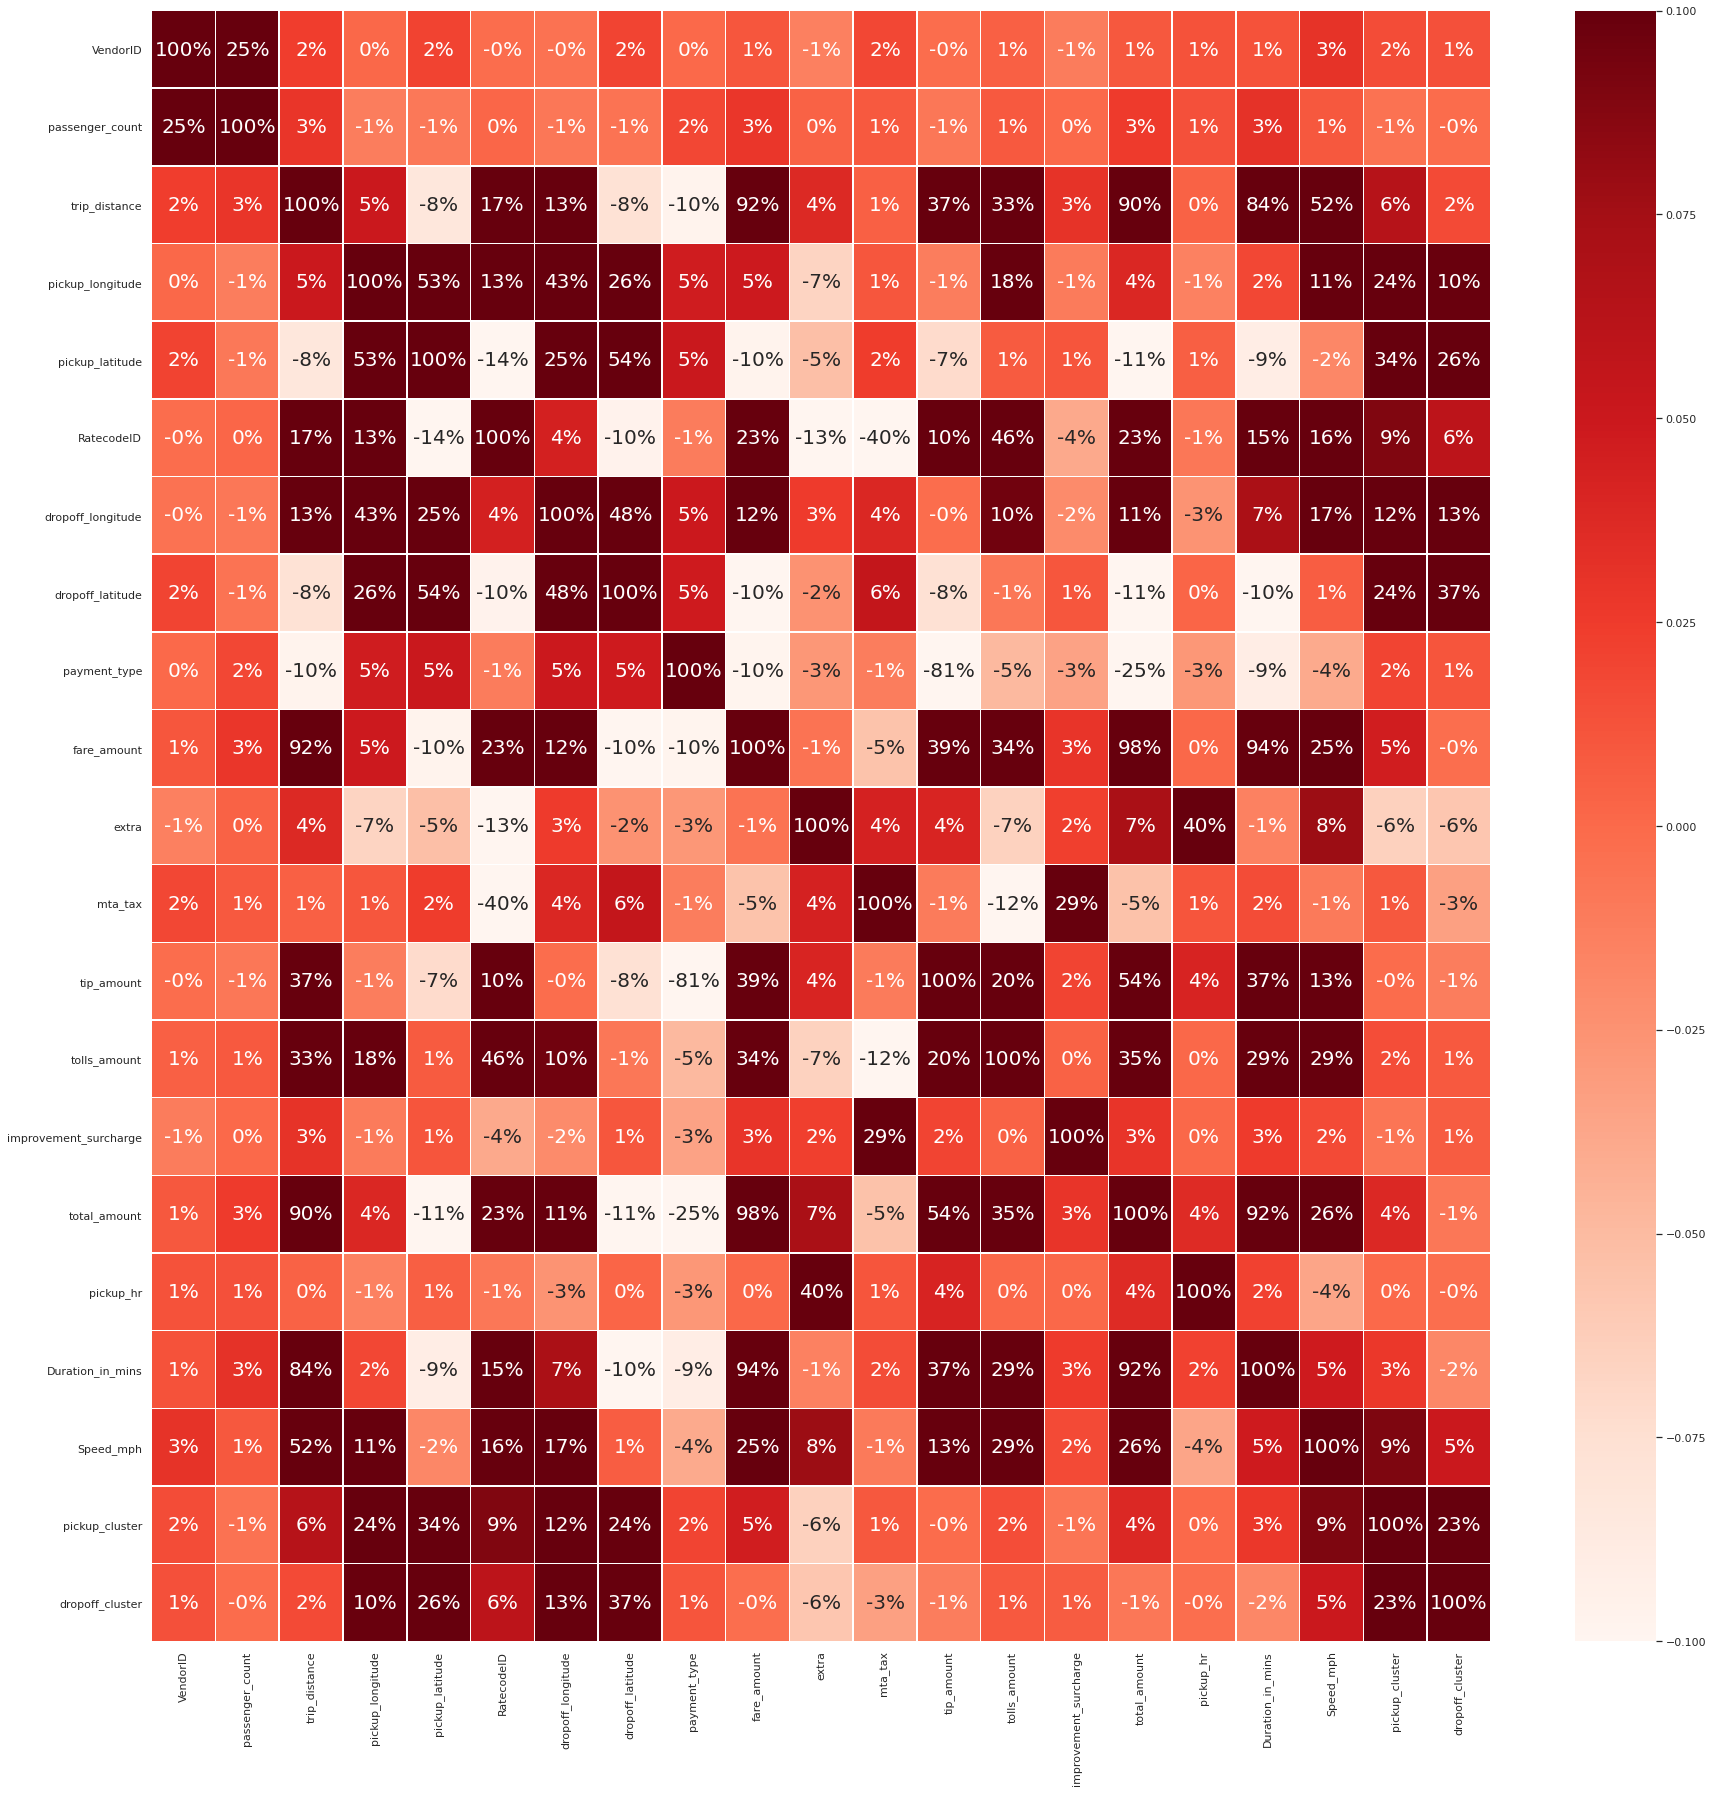

In [0]:
fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches
sns.heatmap( sample.select_dtypes(exclude=['object']).drop('pickup_month' , axis=1).corr(method = 'spearman'), annot=True, vmin=sample.select_dtypes(exclude=['object']).corr().values.min(), vmax=1,fmt='.0%', linewidths=.5, ax=ax ,cmap=plt.cm.Reds,  annot_kws={"size":20})
sns.set(font_scale=1) # font size 2
plt.show()

# Total amount and fare amount have a coorelation of 98% 

#### Predicting Trip Duration <br>
The features used for the prediction are converted to appropriated data types. Null values were dropped from the dataframe and then the data was split into training and test data sets
<br>
<br>
A linear regression module of Pyspark's ML library was used to compute the Mean square errors and other measure parameters.
Also RandomForestRegressor will be used

In [0]:
# Casting numerical features to float
df = df.withColumn('VendorID', df['VendorID'].cast('double'))
df = df.withColumn('passenger_count', df['passenger_count'].cast('double'))
df = df.withColumn('trip_distance', df['trip_distance'].cast('double'))
df = df.withColumn('RatecodeID', df['RatecodeID'].cast('double'))
df = df.withColumn('store_and_fwd_flag', df['store_and_fwd_flag'].cast('double'))
df = df.withColumn('payment_type', df['payment_type'].cast('double'))
df = df.withColumn('fare_amount', df['fare_amount'].cast('double'))
df = df.withColumn('extra', df['extra'].cast('double'))
df = df.withColumn('mta_tax', df['mta_tax'].cast('double'))
df = df.withColumn('tip_amount', df['tip_amount'].cast('double'))
df = df.withColumn('tolls_amount', df['tolls_amount'].cast('double'))
df = df.withColumn('improvement_surcharge', df['improvement_surcharge'].cast('double'))
df = df.withColumn('total_amount', df['total_amount'].cast('double'))

In [0]:
## Importing ML libraries
from pyspark.ml.regression import LinearRegression  
from pyspark.ml.feature import VectorAssembler  
from pyspark.ml.feature import StandardScaler  
from pyspark.ml import Pipeline  
from pyspark.sql.functions import *  


In [0]:
# Keeping one those features whhich are determental in deciding the trip duration
# Furthermore I removed total amount as it had 98% corelation with fare amount
# Dates / Months were not necessary
# Also Lats and Longs were not reqd. as we created a region cluster instead of them

features =   ['passenger_count','trip_distance','RatecodeID','payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount','improvement_surcharge', 'pickup_cluster', 'dropoff_cluster', 'pickup_day', 'pickup_hr', 'Speed_mph'] 

lr_data = df.select(col("Duration_in_mins").alias("label"), *features)  # Learning data consisting of features and Label

In [0]:
display(lr_data)


label,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,pickup_cluster,dropoff_cluster,pickup_hr,pickup_day,Speed_mph
18.5,2.0,5.519999980926514,1.0,2.0,19.0,0.5,0.5,0.0,0.0,0.3,2,7,0,Friday,17.902702640842747
26.75,2.0,7.449999809265137,1.0,2.0,26.0,0.5,0.5,0.0,0.0,0.3,13,10,0,Friday,16.71027994601526
11.9,1.0,1.2000000476837158,1.0,2.0,9.0,0.5,0.5,0.0,0.0,0.3,2,2,0,Friday,6.050420408489323
11.2,1.0,6.0,1.0,2.0,18.0,0.5,0.5,0.0,0.0,0.3,10,4,0,Friday,32.142857142857146
11.1,1.0,3.2100000381469727,1.0,2.0,11.5,0.5,0.5,0.0,0.0,0.3,13,13,0,Friday,17.351351557551205
6.266666666666667,1.0,0.7900000214576721,1.0,2.0,6.0,0.5,0.5,0.0,0.0,0.3,2,2,0,Friday,7.56382999267984
15.766666666666667,6.0,2.430000066757202,1.0,1.0,12.0,0.5,0.5,3.99,0.0,0.3,9,2,0,Friday,9.247357547913243
0.13333333333333333,4.0,0.009999999776482582,1.0,2.0,2.5,0.5,0.5,0.0,0.0,0.3,2,2,0,Friday,4.499999899417162
14.466666666666667,1.0,3.700000047683716,1.0,1.0,14.0,0.5,0.5,3.05,0.0,0.3,2,13,0,Friday,15.345622317582231
14.366666666666667,2.0,2.200000047683716,1.0,1.0,11.0,0.5,0.5,1.5,0.0,0.3,13,2,0,Friday,9.187935233945913


In [0]:
## check for Null Values and dropping null values if any
for f in features:
    print (f)
    print (lr_data.where(col(f).isNull()).count())
    
lr_data = lr_data.dropna()

#we observe speed has 11381 NULL  Values

In [0]:
#%fs rm -r dbfs:/FileStore/lr_data.csv

res1: Boolean = false

In [0]:
# CHECKPOINT 3
# To save a data frame as CSV on DBFS
#lr_data.coalesce(1).write.format('com.databricks.spark.csv').option("sep",",").option('header', 'true').save('dbfs:/FileStore/lr_data.csv')
lr_data = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('dbfs:/FileStore/lr_data.csv') #Loading data




In [0]:
display(lr_describe)

summary,label,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,pickup_cluster,dropoff_cluster,pickup_hr,pickup_day,Speed_mph
count,10741858,10741858,10741858,10741858,10741858,10741858,10741858,10741858,10741858,10741858,10741858,10741858,10741858,10741858,10741858,10741858
mean,12.705694845031974,1.670753793245079,2.722332201453687,1.024718163282367,1.3460101595087182,11.925538431060971,0.31549055666161296,0.4990937750247676,1.6736220856763817,0.23683230312673495,0.2999871781914026,7.104509108200834,7.01142772507326,13.550976562900011,null,11.950304266150155
stddev,9.002815666187244,1.3252515392821596,3.1307956317649857,0.3496359969931283,0.48844613243259327,9.067011783404315,0.36586202822280645,0.024169673942237516,2.133502805249881,1.1518283707393686,0.001959458846275579,3.9510103263181953,4.03177500712991,6.39888807196943,null,6.188189374170514
min,0.016666666666666666,0.0,0.0,1.0,1.0,0.0,-32.69,0.0,-0.17,0.0,0.0,0,0,0,Friday,0.0
max,59.983333333333334,9.0,19.989999771118164,99.0,5.0,79.2,8.5,33.49,79.0,75.0,0.3,14,14,23,Wednesday,54.989816700610994


#### Train Test Split
Split the data into train test with a raito if 4 : 1

In [0]:
#Splitting into Train and Test

(training, test) = lr_data.randomSplit([.8, .2])

### One Hot Encoding



We can not apply OneHotEncoder to string columns directly. We need to first convert string columns to numeric value. For that we will use StringIndexer. After that we can apply OneHotEncoder.
<br>

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer,OneHotEncoder


day_indexer = StringIndexer(inputCol="pickup_day", outputCol="pickup_day_index") # Indexwer
day_encoder= OneHotEncoder(inputCol="pickup_day_index", outputCol="pickup_day_vec") # Encoder

encoding_pipeline = Pipeline(stages=[day_indexer, day_encoder]) 
encoder = encoding_pipeline.fit(training)
training_en = encoder.transform(training)

In [0]:
display(training_en)

label,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,pickup_cluster,dropoff_cluster,pickup_hr,pickup_day,Speed_mph,pickup_day_index,pickup_day_vec
0.016666666666666666,1.0,0.0,1.0,1.0,2.5,0.0,0.5,0.99,0.0,0.3,0,0,9,Saturday,0.0,1.0,"Map(vectorType -> sparse, length -> 6, indices -> List(1), values -> List(1.0))"
0.016666666666666666,1.0,0.0,1.0,2.0,2.5,0.0,0.5,0.0,0.0,0.3,1,1,14,Friday,0.0,0.0,"Map(vectorType -> sparse, length -> 6, indices -> List(0), values -> List(1.0))"
0.016666666666666666,1.0,0.0,1.0,2.0,2.5,0.0,0.5,0.0,0.0,0.3,1,2,9,Saturday,0.0,1.0,"Map(vectorType -> sparse, length -> 6, indices -> List(1), values -> List(1.0))"
0.016666666666666666,1.0,0.0,1.0,2.0,2.5,0.0,0.5,0.0,0.0,0.3,1,2,9,Saturday,0.0,1.0,"Map(vectorType -> sparse, length -> 6, indices -> List(1), values -> List(1.0))"
0.016666666666666666,1.0,0.0,1.0,2.0,2.5,0.5,0.5,0.0,0.0,0.3,1,1,1,Friday,0.0,0.0,"Map(vectorType -> sparse, length -> 6, indices -> List(0), values -> List(1.0))"
0.016666666666666666,1.0,0.0,1.0,3.0,2.5,0.0,0.5,0.0,0.0,0.3,7,7,8,Sunday,0.0,2.0,"Map(vectorType -> sparse, length -> 6, indices -> List(2), values -> List(1.0))"
0.016666666666666666,1.0,0.0,1.0,4.0,2.5,0.0,0.5,0.0,0.0,0.3,9,9,13,Sunday,0.0,2.0,"Map(vectorType -> sparse, length -> 6, indices -> List(2), values -> List(1.0))"
0.016666666666666666,1.0,0.0,2.0,3.0,52.0,0.0,0.5,0.0,0.0,0.3,4,4,4,Friday,0.0,0.0,"Map(vectorType -> sparse, length -> 6, indices -> List(0), values -> List(1.0))"
0.016666666666666666,1.0,0.0,5.0,1.0,4.5,0.0,0.0,0.96,0.0,0.3,9,9,15,Friday,0.0,0.0,"Map(vectorType -> sparse, length -> 6, indices -> List(0), values -> List(1.0))"
0.016666666666666666,1.0,0.0,5.0,1.0,7.3,0.0,0.0,2.28,0.0,0.3,1,1,19,Friday,0.0,0.0,"Map(vectorType -> sparse, length -> 6, indices -> List(0), values -> List(1.0))"


In [0]:
training_en = training_en.drop('pickup_day').drop('pickup_day_index') # DROPPING OfF THESE COLUMNS as we wont require them during training Linear Regressor


#### Scaling Features 
Standardize features by removing the mean and scaling to unit variance <br>

The standard score of a sample x is calculated as:<br>

z = (x - u) / s <br>

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

#Setting  a Standard Scaler
standardScaler = StandardScaler(inputCol="unscaled_features", outputCol="features")  



#LINEAR REGRESSOR

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

lr = LinearRegression(maxIter=10, regParam=.01)
stages = [vectorAssembler, standardScaler, lr]  
#A simple pipeline, which acts as an estimator. A Pipeline consists of a sequence of stages, each of which is either an Estimator or a Transformer. When Pipeline.fit() is called, the stages are executed in order.
pipeline = Pipeline(stages=stages)
lrEvaluator=RegressionEvaluator(metricName="rmse")

# Grid
paramGrid = (ParamGridBuilder().addGrid(lr.regParam, [0.1, 0.01,0.5]) 
                              .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
                              .build())

   
# Crossval
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=lrEvaluator,
                          numFolds=3)

lrcvModel = crossval.fit(training_en)
print('--------Training Complete !------')
lrcvModel.save('LRCV')


In [0]:
# EVALUATION OF LINEAR REGRESSOR WITHOUT CROSS VAL
from pyspark.ml.evaluation import RegressionEvaluator  
eval = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(prediction)  
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(prediction, {eval.metricName: "mse"})  
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(prediction, {eval.metricName: "mae"})  
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(prediction, {eval.metricName: "r2"})  
print("r2: %.3f" %r2)

RMSE: 3.337
MSE: 11.134
MAE: 2.015
r2: 0.863

## DECISION TREE REGRESSOR


Decision trees are predictive models that use a set of binary rules to calculate a target value.

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import StringIndexer,OneHotEncoder
from pyspark.ml import Pipeline

In [0]:
day_indexer_str = StringIndexer(inputCol="pickup_day", outputCol="pickup_day_index")
#INDEXING CATEGORICAL IE PICKUPDAY
training_indexed = day_indexer_str.fit(training).transform(training)                               
training_indexed = training_indexed.drop('pickup_day')          

# Need another Vector assembler because Decision Trees need no Encoded features , so we drop the OH_encoded dense vector column
vectorAssembler_rt = VectorAssembler(inputCols=['passenger_count',
 'trip_distance',
 'RatecodeID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'pickup_cluster',
 'dropoff_cluster',
 'pickup_hr',
 'Speed_mph',
 'pickup_day_index'], outputCol="unscaled_features") 




In [0]:

dt = DecisionTreeRegressor(maxDepth=5) # Creating RT Model
stages = [vectorAssembler_rt, standardScaler, gbt]   # Setting up pipeline stages
pipeline = Pipeline(stages=stages)  # creating pipeline
dt_evaluator = RegressionEvaluator(metricName="rmse")  #Evaluator for Regression, which expects input columns prediction, label and an optional weight column.

# We use a ParamGridBuilder to construct a grid of parameters to search over.
# A CrossValidator requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
# We use a ParamGridBuilder to construct a grid of parameters to search over.
dtparamGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2,3,5])
             .addGrid(gbt.maxBins, [4, 8,32])  
             .build())


dtcv = CrossValidator(estimator = pipeline,
                      estimatorParamMaps = dtparamGrid,
                      evaluator = gbt_evaluator,
                      numFolds = 3)  #was 10 , 5   Number of K folds

dtcvModel = dtcv.fit(training_indexed) # TRAINING REGRESSION TREE
dtcvModel.save('DTCV') #SAVING THE MODEL





/databricks/spark/python/pyspark/ml/util.py:838: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

In [0]:

# EVALUATION OF DT with  CROSS VALID ON TEST SET

test_idx = day_indexer_str.fit(test).transform(test)  
prediction = gbtcvModel.transform(test_idx)
eval = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(prediction)  
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(prediction, {eval.metricName: "mse"})  
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(prediction, {eval.metricName: "mae"})  
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(prediction, {eval.metricName: "r2"})  
print("r2: %.3f" %r2)

RMSE: 2.535
MSE: 6.427
MAE: 1.425
r2: 0.921

In [0]:
# EVALUATION OF CROSS VALID DT  ON TRAIN SET
 
  #INDEXING CATEGORCAL

prediction = gbtcvModel.transform(training_indexed)
eval = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(prediction)  
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(prediction, {eval.metricName: "mse"})  
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(prediction, {eval.metricName: "mae"})  
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(prediction, {eval.metricName: "r2"})  
print("r2: %.3f" %r2)

RMSE: 2.531
MSE: 6.404
MAE: 1.425
r2: 0.921

### GRADIENT BOOSTED REGRESSOR

Gradient boosted decision trees algorithm which uses boosting method to combine individual decision trees.
Boosting means combining a learning algorithm in series to achieve a strong learner from many sequentially connected weak learners. In case of gradient boosted decision trees algorithm, the weak learners are decision trees.

</br>

In [0]:
gbt = GBTRegressor(maxDepth=5) # Creating GBT model
stages = [vectorAssembler_rt, standardScaler, gbt]  
pipeline = Pipeline(stages=stages)
gbt_evaluator = RegressionEvaluator(metricName="rmse")

# Grid Search
gbtparamGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2,3,5,10])
             .addGrid(gbt.maxBins, [4, 8,32])  # 4 , 8 , 32
             .build())

# Crossvalidaor
gbtcv = CrossValidator(estimator = pipeline, 
                      estimatorParamMaps = gbtparamGrid,
                      evaluator = gbt_evaluator,
                      numFolds = 3)  #was 10 , 5

gbtcvModel = gbtcv.fit(training_indexed) # TRAINING GRADIENT BOOST
print('--------Training Complete !------')
gbtcvModel.save('GBTCV') #SAVING THE MODEL

/databricks/spark/python/pyspark/ml/util.py:838: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

In [0]:
#EVALUATING GBT ON __TEST SET__

test_idx = day_indexer_str.fit(test).transform(test)  
prediction = gbtcv.transform(test_idx)

eval = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(prediction)  
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(prediction, {eval.metricName: "mse"})  
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(prediction, {eval.metricName: "mae"})  
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(prediction, {eval.metricName: "r2"})  
print("r2: %.3f" %r2)

RMSE: 1.385
MSE: 1.918
MAE: 0.853
r2: 0.976

In [0]:
# EVALUATION OF GBT ON TRAIN SET

#test_idx = day_indexer_str.fit(test).transform(test)  
prediction = gbt.transform(training_indexed)

eval = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(prediction)  
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(prediction, {eval.metricName: "mse"})  
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(prediction, {eval.metricName: "mae"})  
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(prediction, {eval.metricName: "r2"})  
print("r2: %.3f" %r2)

RMSE: 1.380
MSE: 1.903
MAE: 0.851
r2: 0.977

## RESULT VISUALIZATION

Visualizaing the results for GBT

In [0]:
p_sample = prediction.sample(withReplacement=False, fraction=0.01, seed=3).toPandas() # Taking Sample from Prediction to for visualization

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 Unable to convert the field unscaled_features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
 warnings.warn(msg)

Out[55]:

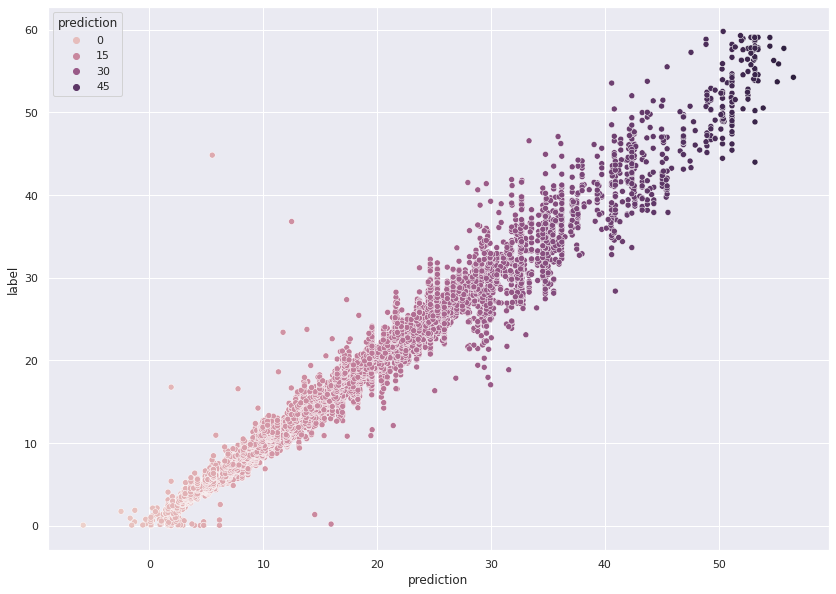

<matplotlib.axes._subplots.AxesSubplot at 0x7f042b0fb250>

In [0]:
sns.scatterplot(data = p_sample, x = 'prediction' , y = 'label' , hue = 'prediction')

Out[73]:

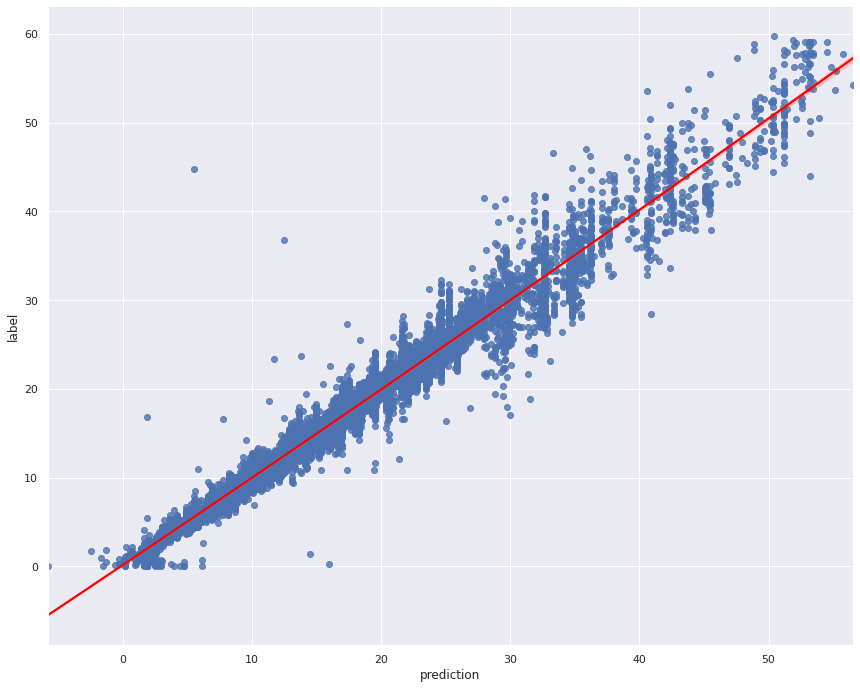

<seaborn.axisgrid.FacetGrid at 0x7f04287ff1c0>

In [0]:
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(14, 10)})
sns.lmplot(data = p_sample, x = 'prediction' , y = 'label' ,order = 2 ,  height=9.5, aspect=1.25 , line_kws={'color': 'red'})


### END